### Import libraries

In [78]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read CSV

In [79]:
df = pd.read_csv("/media/ggmez/disco_compartido/Usuarios/ggmez2/Documentos/magister_ing_informatica/Big_data/Dataset_Calidad_Agua.csv", sep=';', header=0)

print(df)

       Ph  Dureza  Solidos  Cloraminas  Sulfato  Conductividad  \
0     NaN  204.89 20791.32        7.30   368.52         564.31   
1    3.72  129.42 18630.06        6.64      NaN         592.89   
2    8.10  224.24 19909.54        9.28      NaN         418.61   
3    8.32  214.37 22018.42        8.06   356.89         363.27   
4    9.09  181.10 17978.99        6.55   310.14         398.41   
...   ...     ...      ...         ...      ...            ...   
3271 4.67  193.68 47580.99        7.17   359.95         526.42   
3272 7.81  193.55 17329.80        8.06      NaN         392.45   
3273 9.42  175.76 33155.58        7.35      NaN         432.04   
3274 5.13  230.60 11983.87        6.30      NaN         402.88   
3275 7.87  195.10 17404.18        7.51      NaN         327.46   

      Carbono_Organico  Trihalometanos  Turbiedad Potabilidad  
0                10.38           86.99       2.96  No Potable  
1                15.18           56.33       4.50  No Potable  
2              

In [80]:
print(df.head(5)) # View the first 5 rows of the DataFrame
print(df.columns) # View the column names
print(df.dtypes) # View the data types of the columns



    Ph  Dureza  Solidos  Cloraminas  Sulfato  Conductividad  Carbono_Organico  \
0  NaN  204.89 20791.32        7.30   368.52         564.31             10.38   
1 3.72  129.42 18630.06        6.64      NaN         592.89             15.18   
2 8.10  224.24 19909.54        9.28      NaN         418.61             16.87   
3 8.32  214.37 22018.42        8.06   356.89         363.27             18.44   
4 9.09  181.10 17978.99        6.55   310.14         398.41             11.56   

   Trihalometanos  Turbiedad Potabilidad  
0           86.99       2.96  No Potable  
1           56.33       4.50  No Potable  
2           66.42       3.06  No Potable  
3          100.34       4.63  No Potable  
4           32.00       4.08  No Potable  
Index(['Ph', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Conductividad',
       'Carbono_Organico', 'Trihalometanos', 'Turbiedad', 'Potabilidad'],
      dtype='object')
Ph                  float64
Dureza              float64
Solidos             float64

In [81]:
df.info() # View detailed information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ph                2785 non-null   float64
 1   Dureza            3276 non-null   float64
 2   Solidos           3276 non-null   float64
 3   Cloraminas        3276 non-null   float64
 4   Sulfato           2495 non-null   float64
 5   Conductividad     3276 non-null   float64
 6   Carbono_Organico  3276 non-null   float64
 7   Trihalometanos    3114 non-null   float64
 8   Turbiedad         3276 non-null   float64
 9   Potabilidad       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


### Estadistica Descriptiva

In [82]:
print(df.describe()) # Descriptive statistics for the numerical columns

           Ph  Dureza  Solidos  Cloraminas  Sulfato  Conductividad  \
count 2785.00 3276.00  3276.00     3276.00  2495.00        3276.00   
mean     7.08  196.37 22014.09        7.12   333.78         426.21   
std      1.59   32.88  8768.57        1.58    41.42          80.82   
min      0.00   47.43   320.94        0.35   129.00         181.48   
25%      6.09  176.85 15666.69        6.13   307.70         365.73   
50%      7.04  196.97 20927.83        7.13   333.07         421.88   
75%      8.06  216.67 27332.76        8.11   359.95         481.79   
max     14.00  323.12 61227.20       13.13   481.03         753.34   

       Carbono_Organico  Trihalometanos  Turbiedad  
count           3276.00         3114.00    3276.00  
mean              14.28           66.40       3.97  
std                3.31           16.18       0.78  
min                2.20            0.74       1.45  
25%               12.07           55.84       3.44  
50%               14.22           66.62       3.96 

### Exploratory Data Analysis

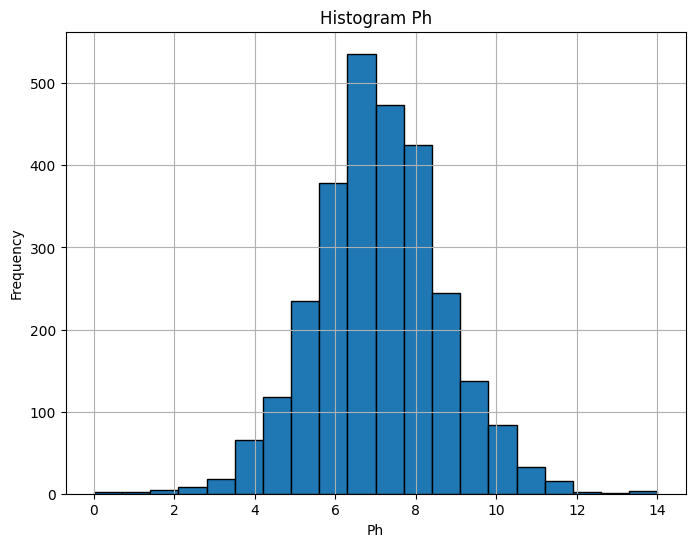

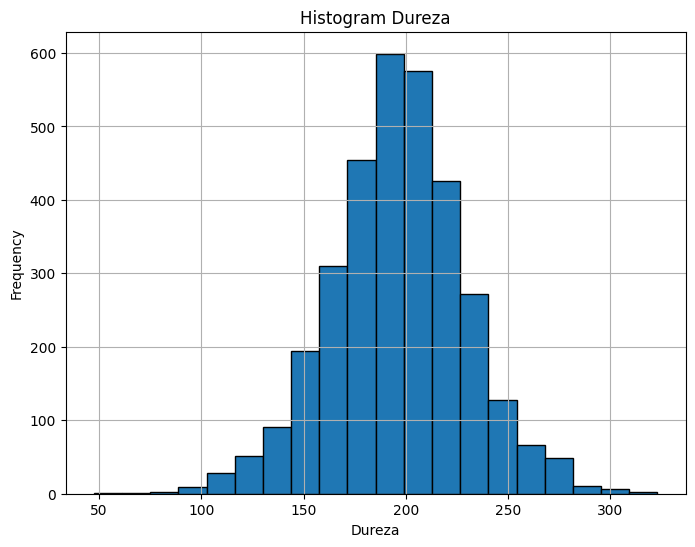

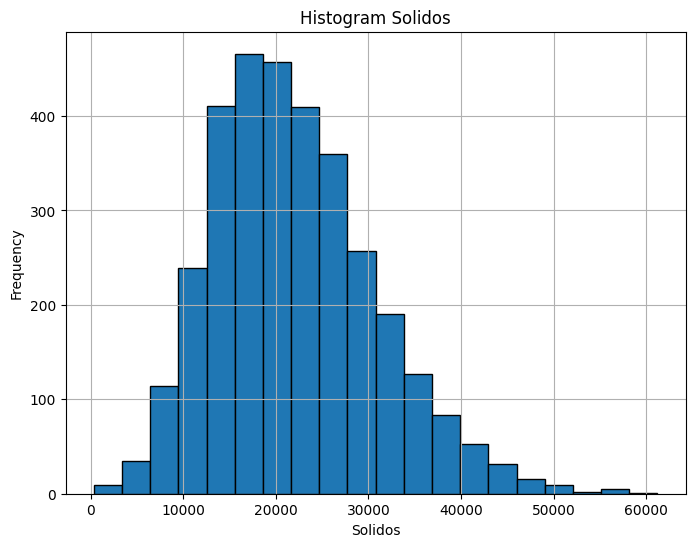

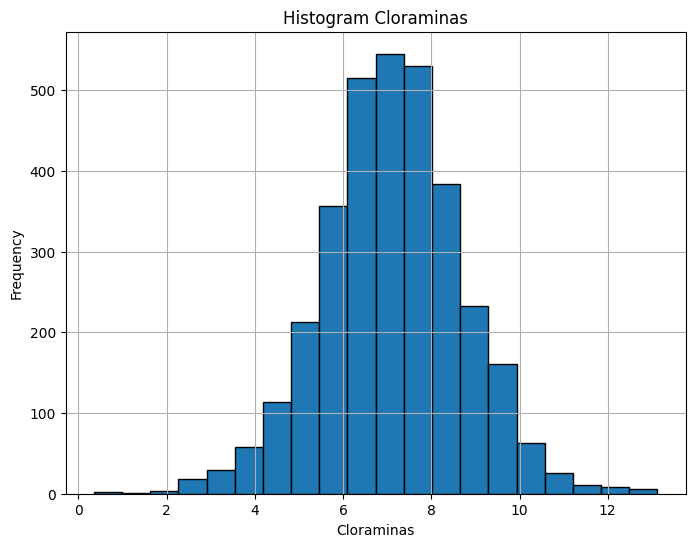

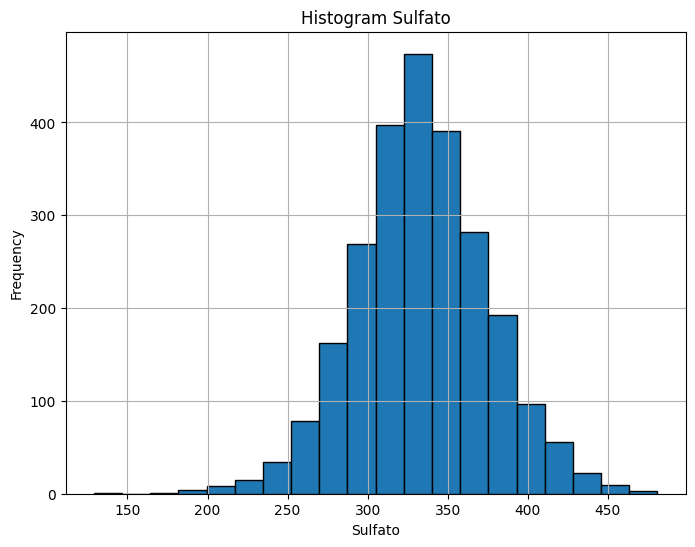

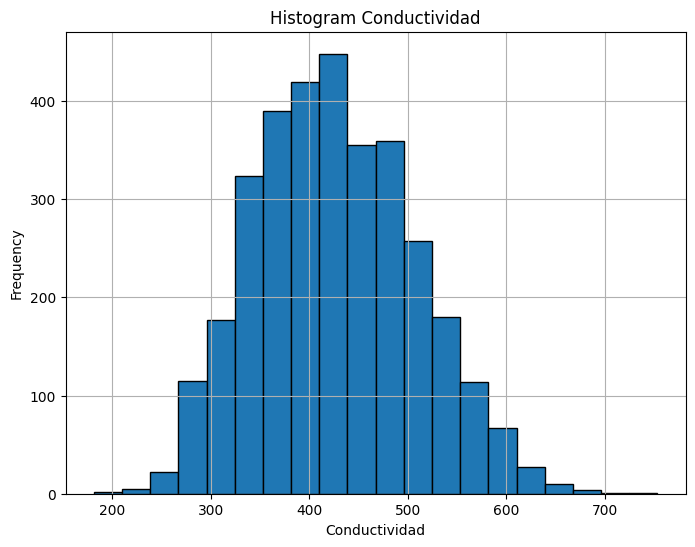

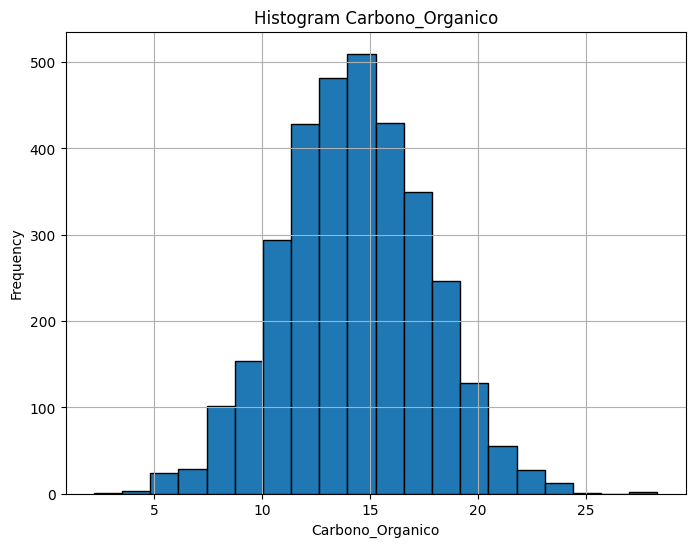

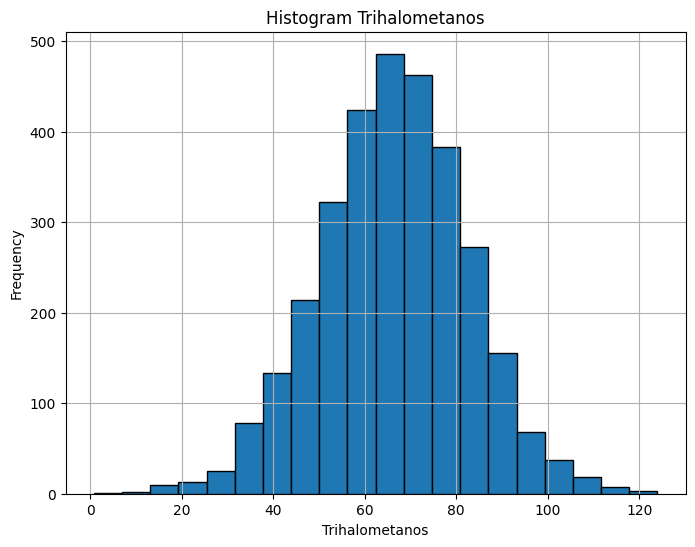

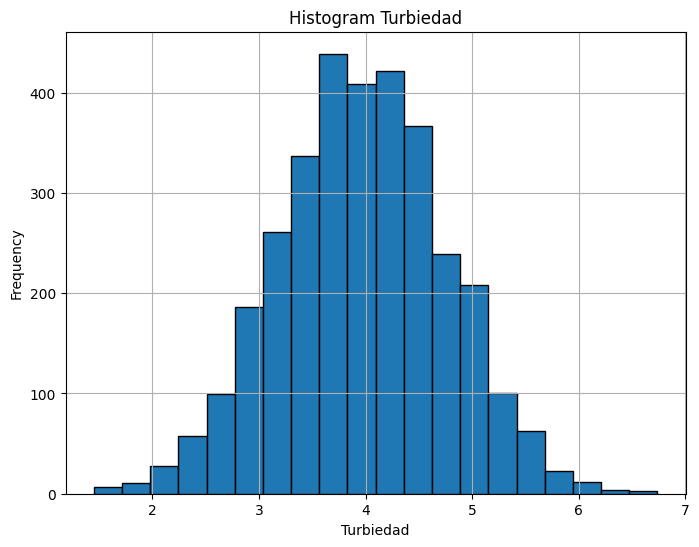

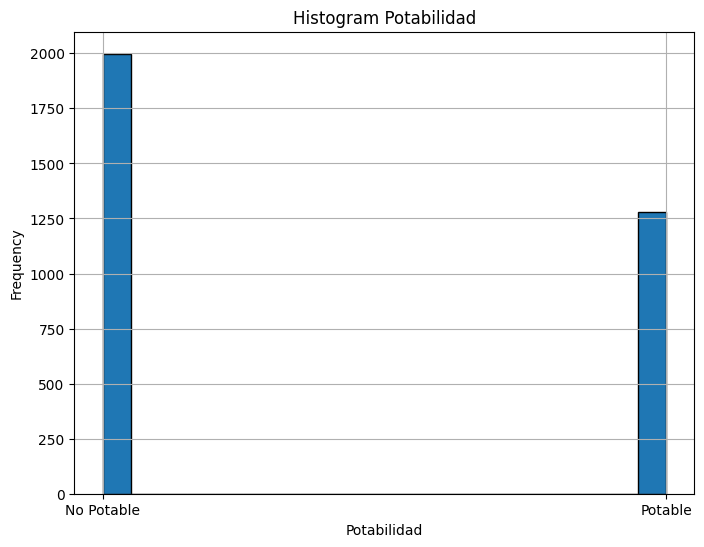

In [83]:
# List the columns you want to plot
columns = ['Ph', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Conductividad','Carbono_Organico', 'Trihalometanos', 'Turbiedad','Potabilidad']

# Create histograms for each column
for column in columns:
       plt.figure(figsize=(8, 6))
       df[column].hist(bins=20, edgecolor='black')
       plt.title(f'Histogram {column}')
       plt.xlabel(column)
       plt.ylabel('Frequency')
       plt.grid(True)
       plt.show()

### Box Plot: A box plot is useful for visualizing the distribution of the data, including outliers.


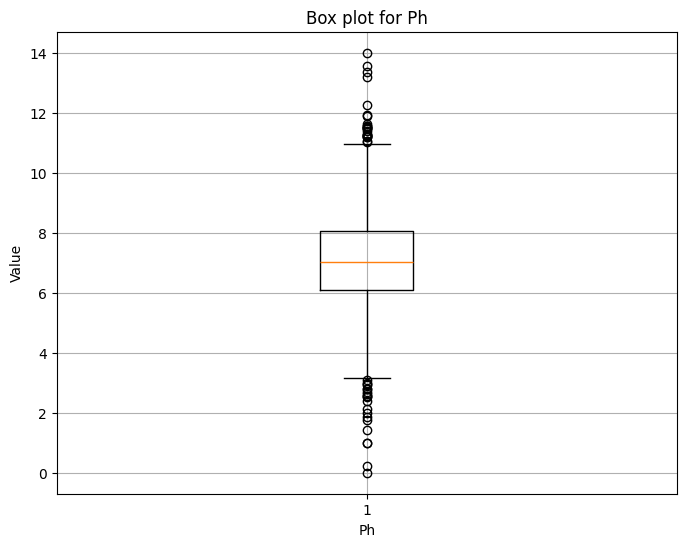

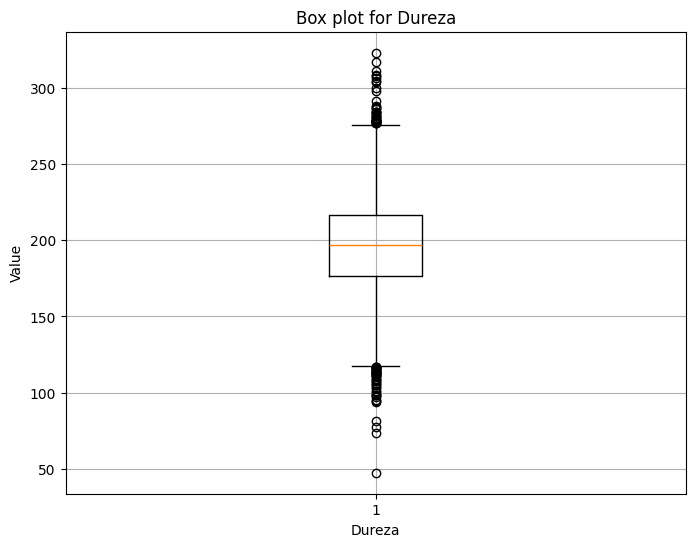

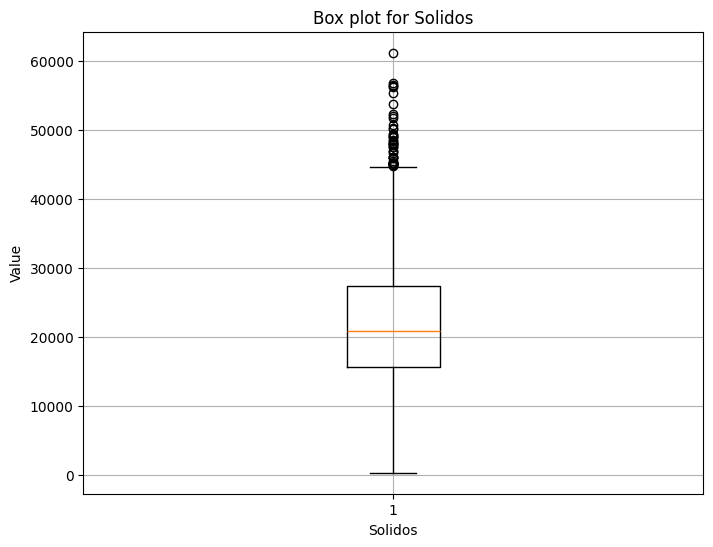

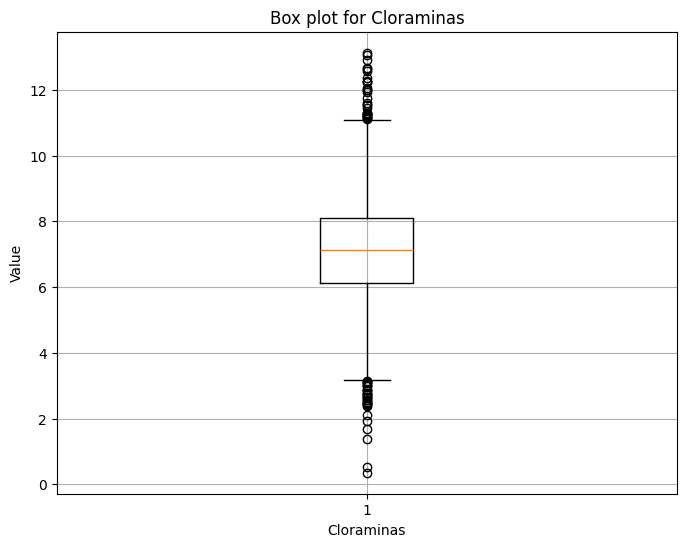

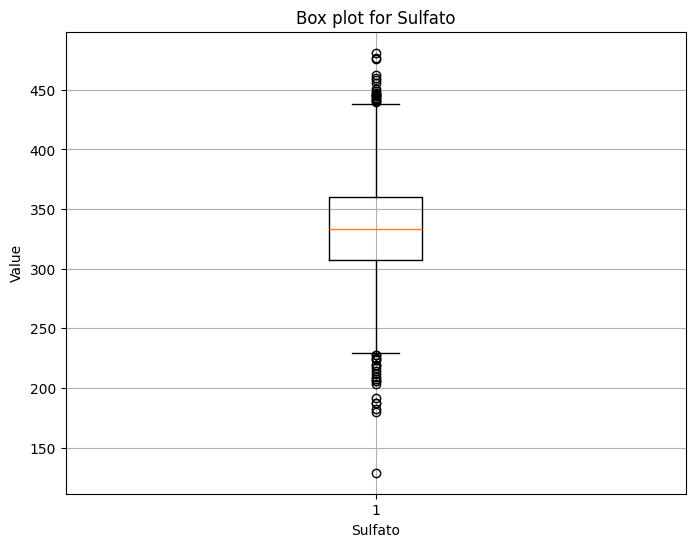

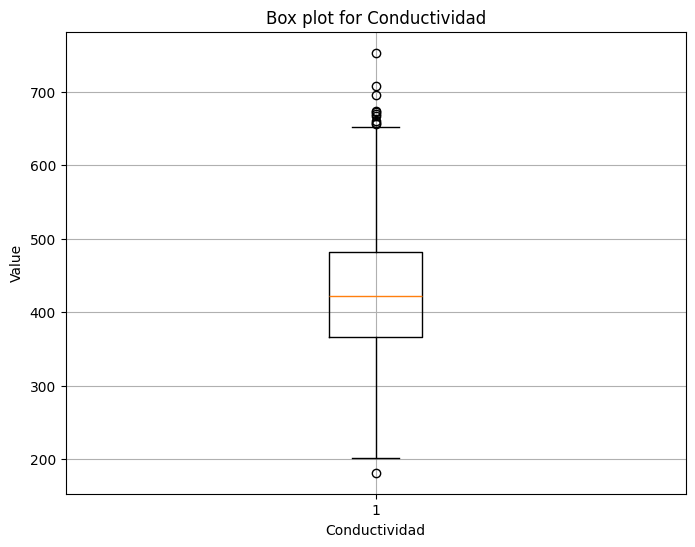

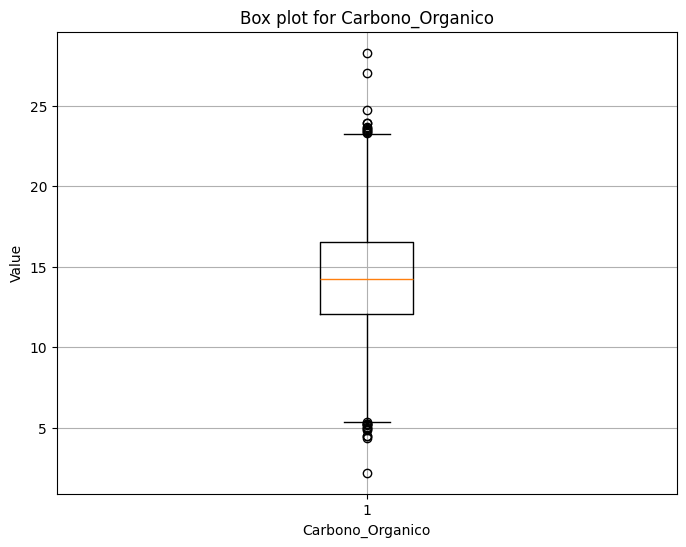

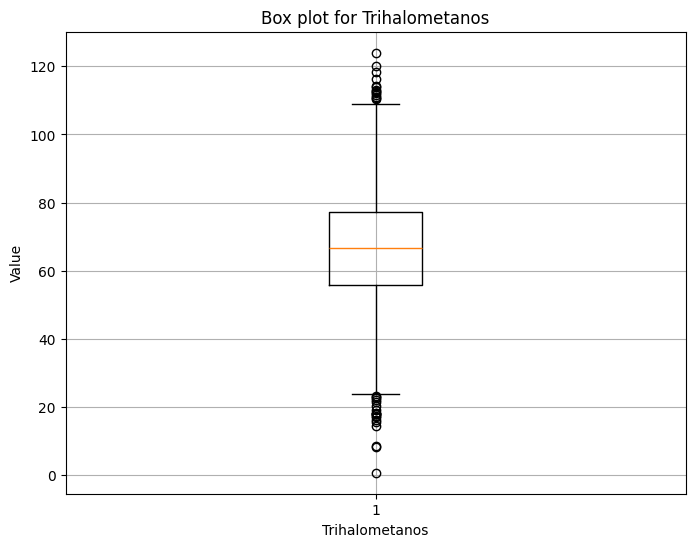

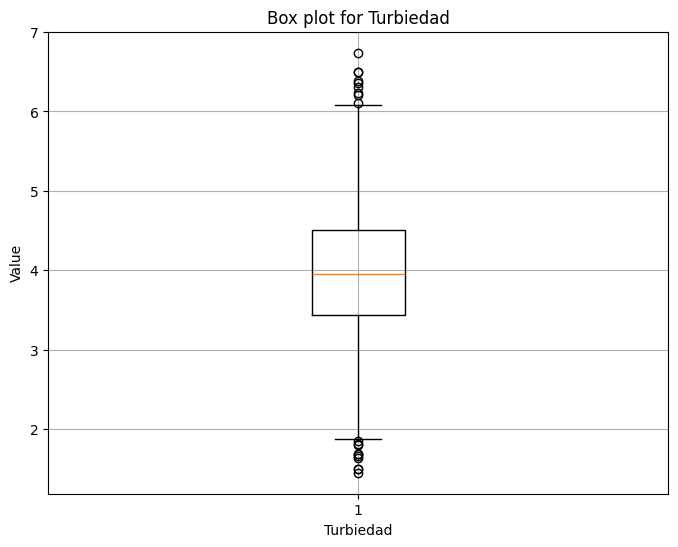

In [84]:
# Box plot for each column
columns = ['Ph', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Conductividad', 'Carbono_Organico', 'Trihalometanos', 'Turbiedad']
for column in columns:
       plt.figure(figsize=(8, 6))
       plt.boxplot(df[column].dropna())
       plt.title(f'Box plot for {column}')
       plt.xlabel(column)
       plt.ylabel('Value')
       plt.grid(True)
       plt.show()

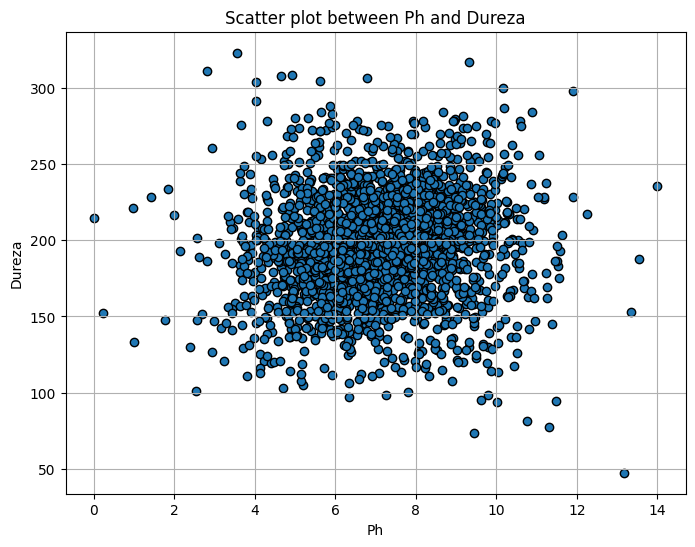

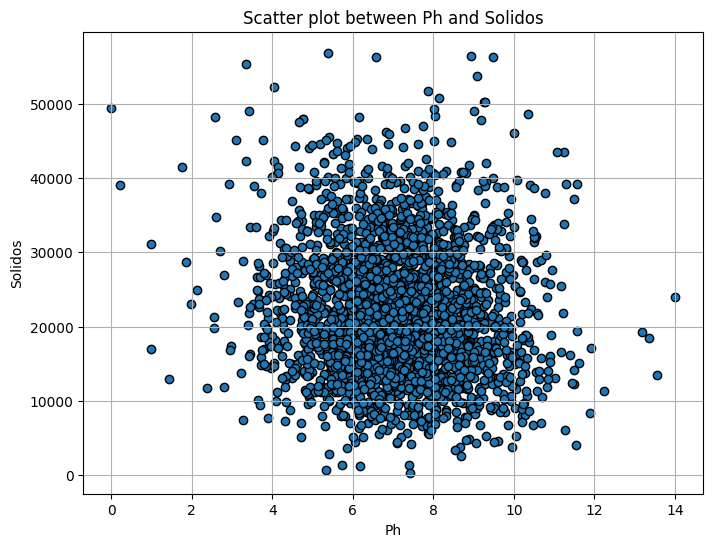

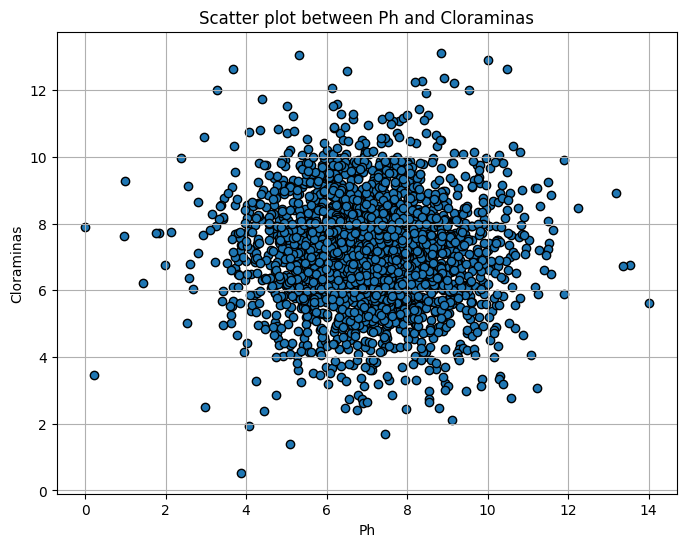

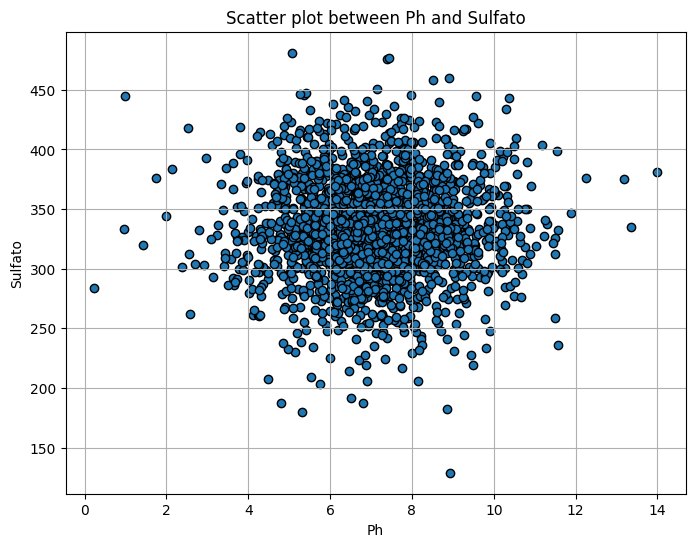

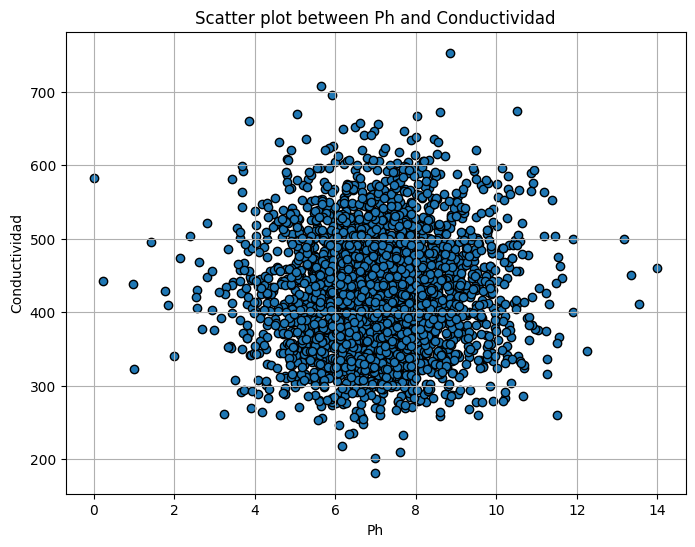

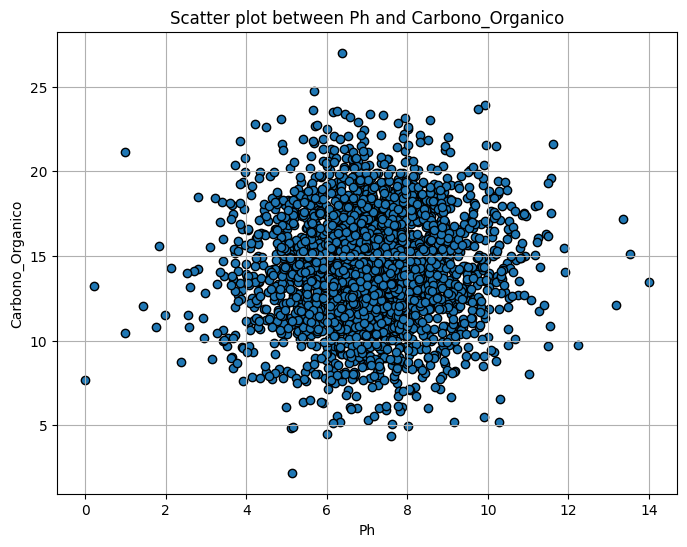

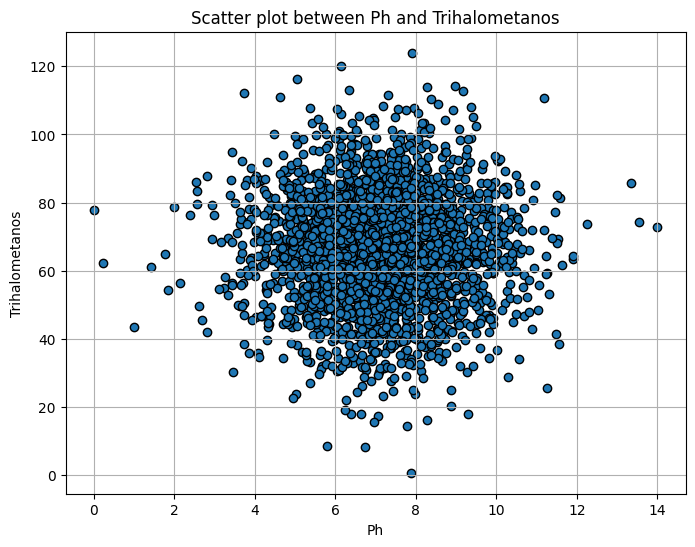

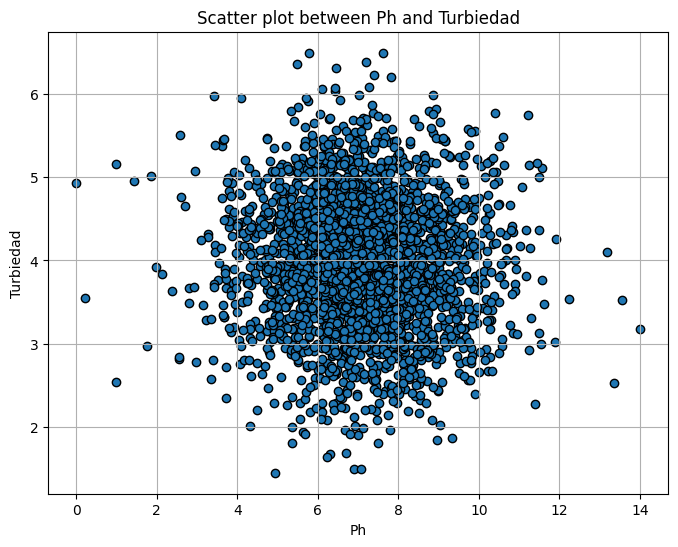

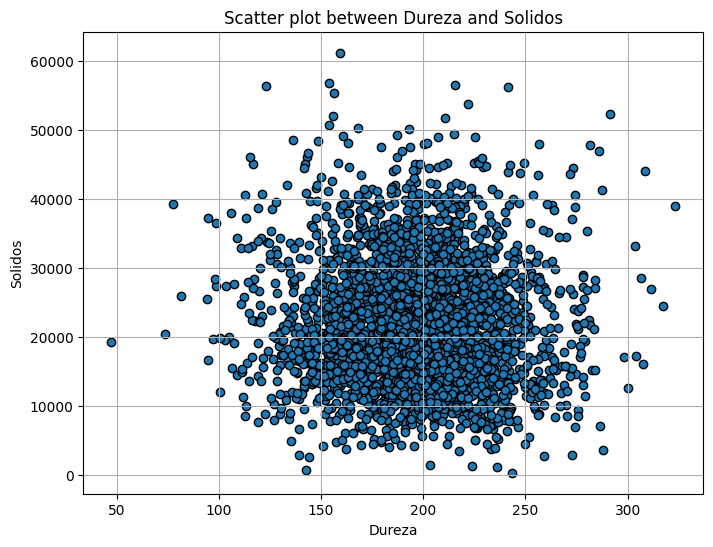

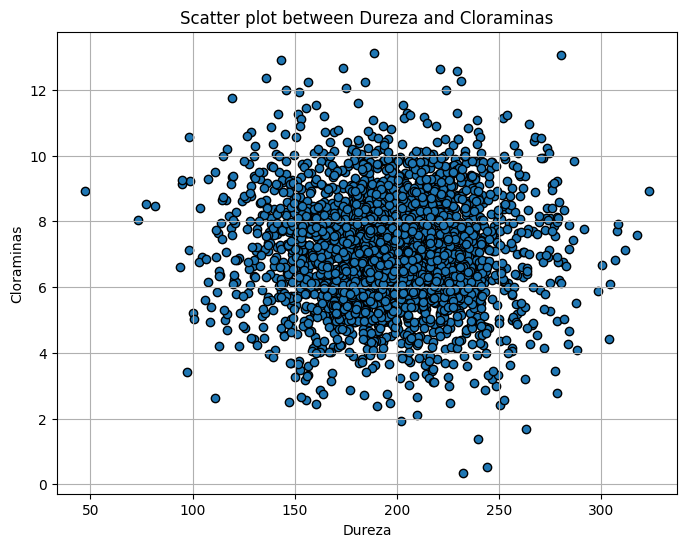

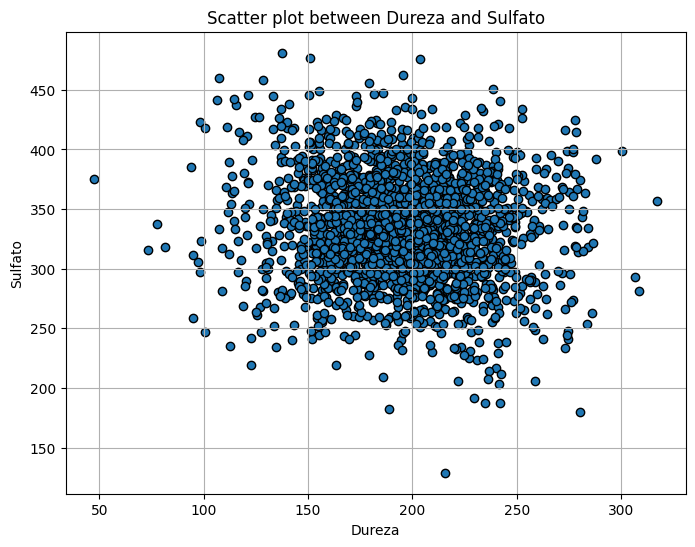

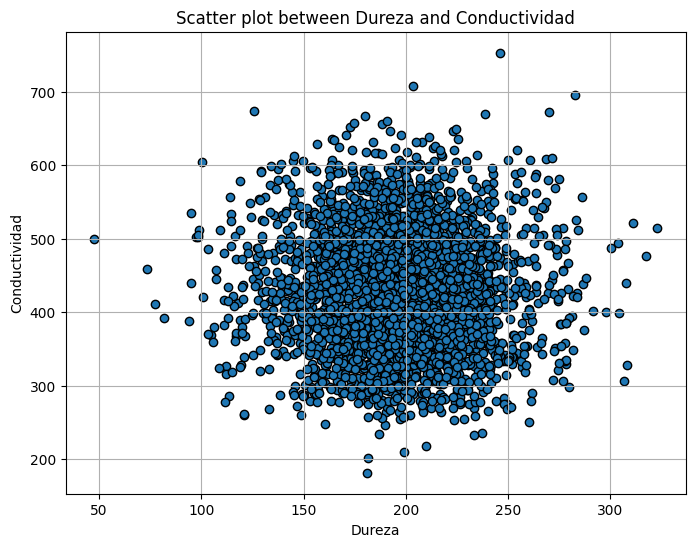

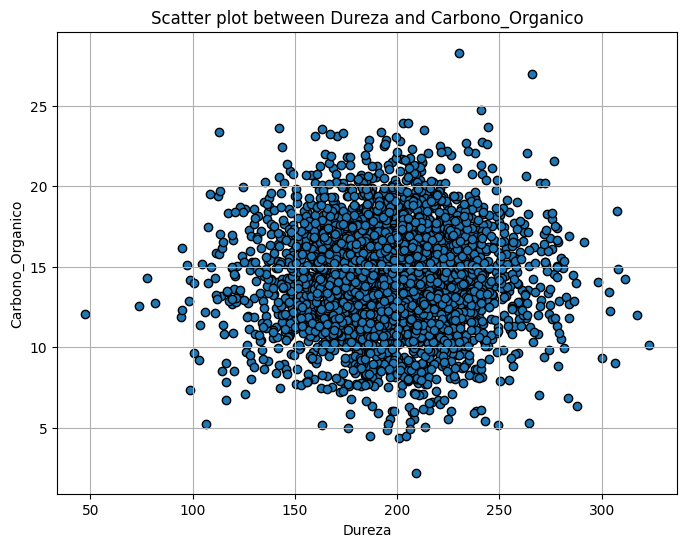

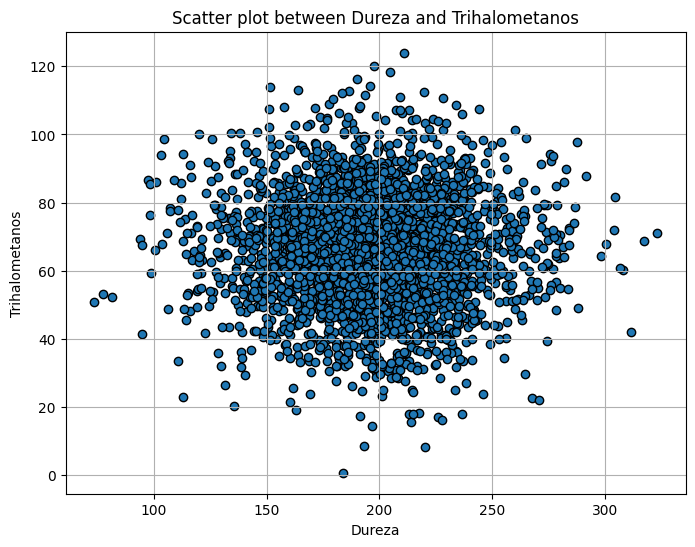

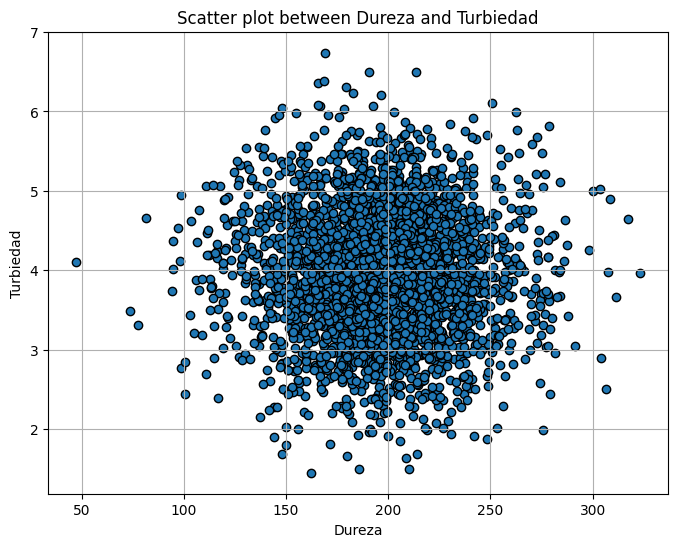

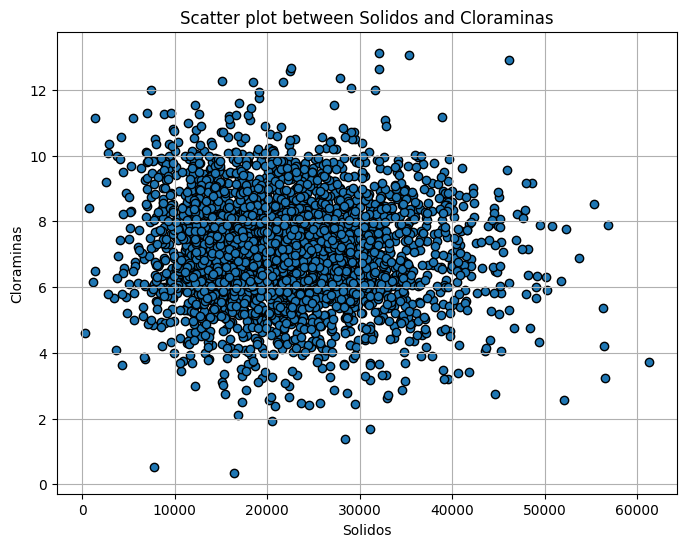

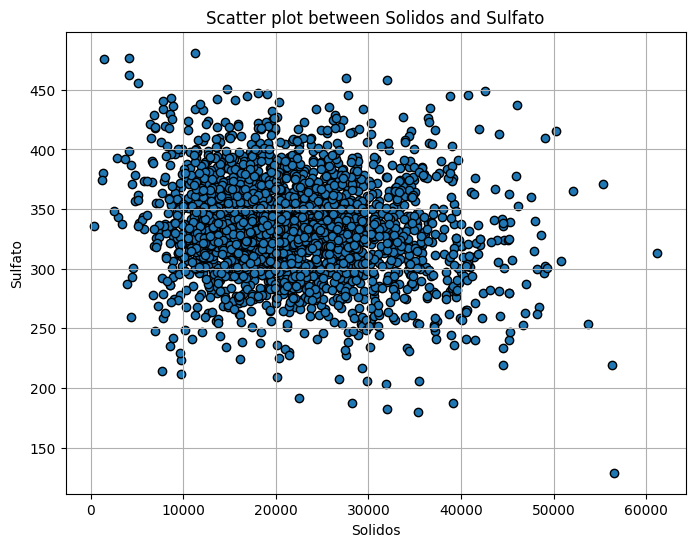

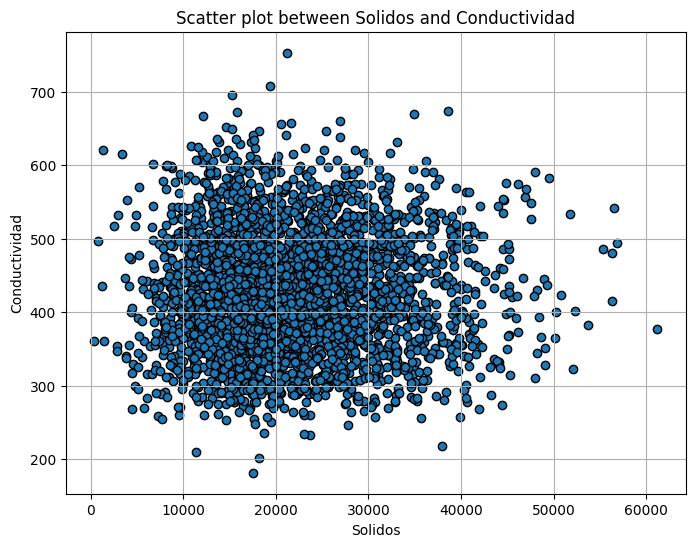

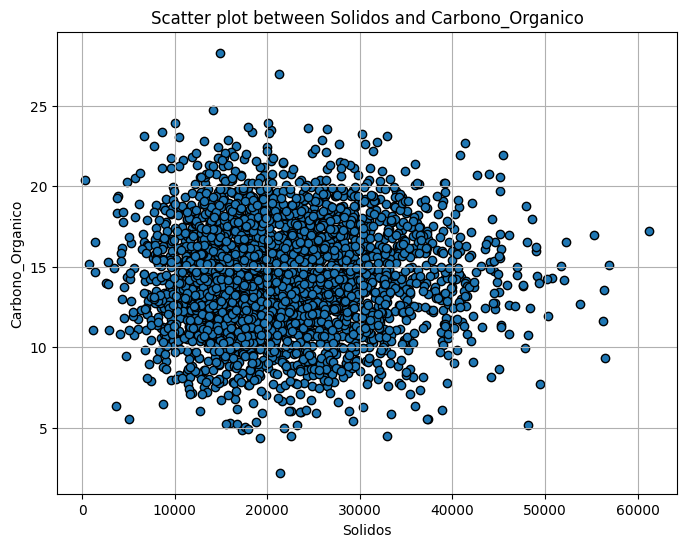

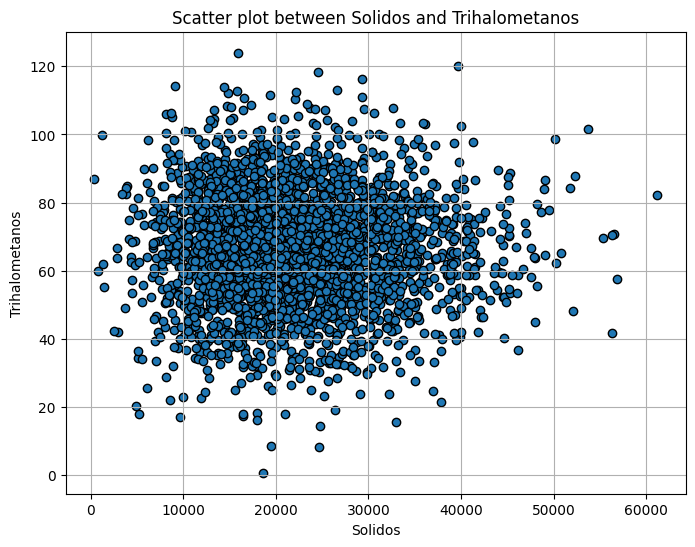

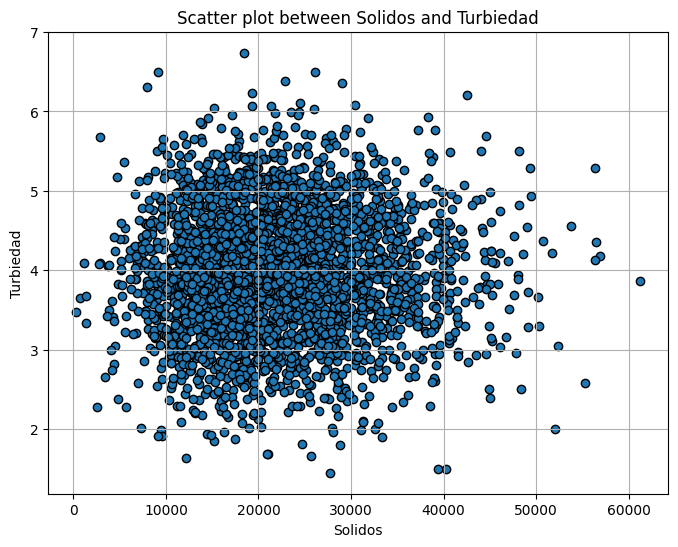

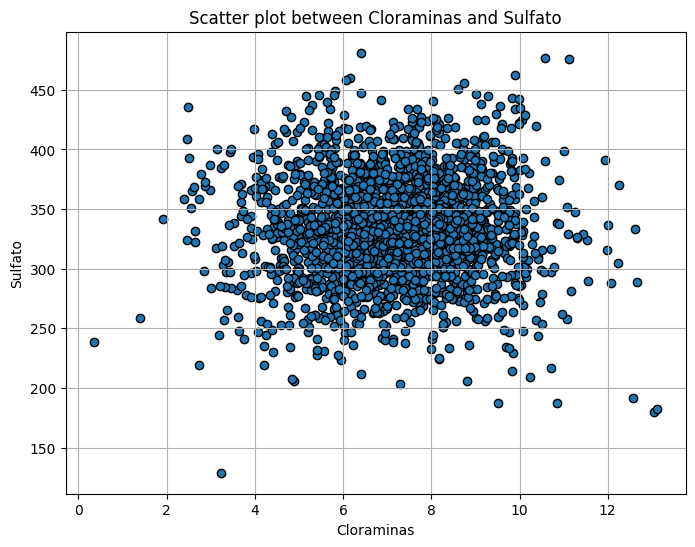

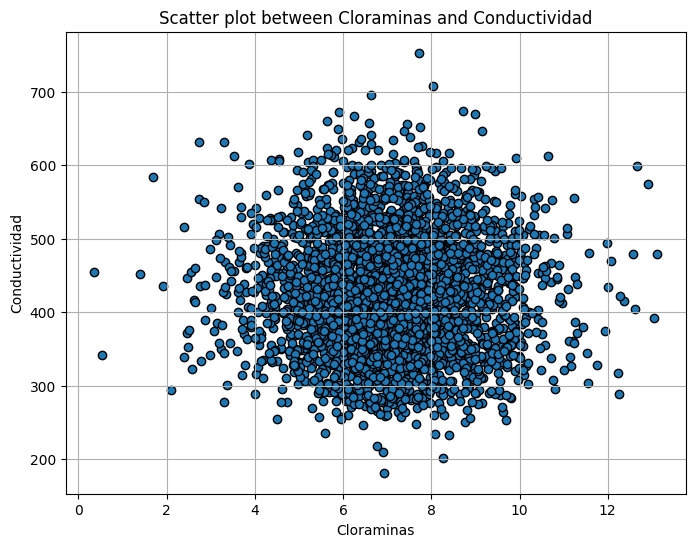

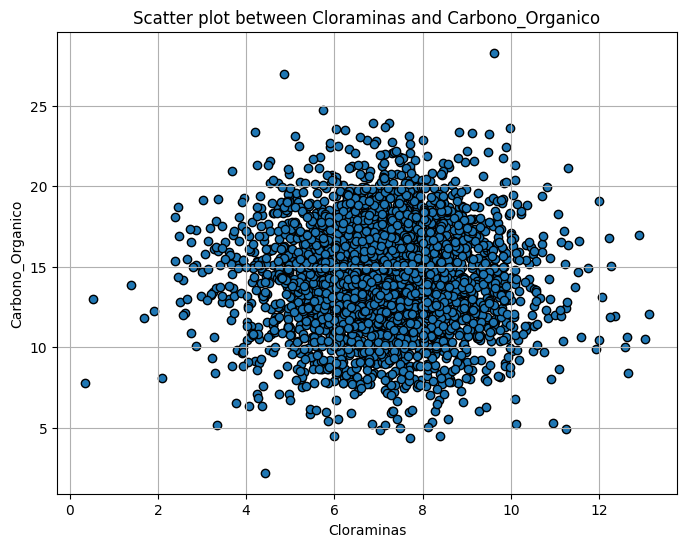

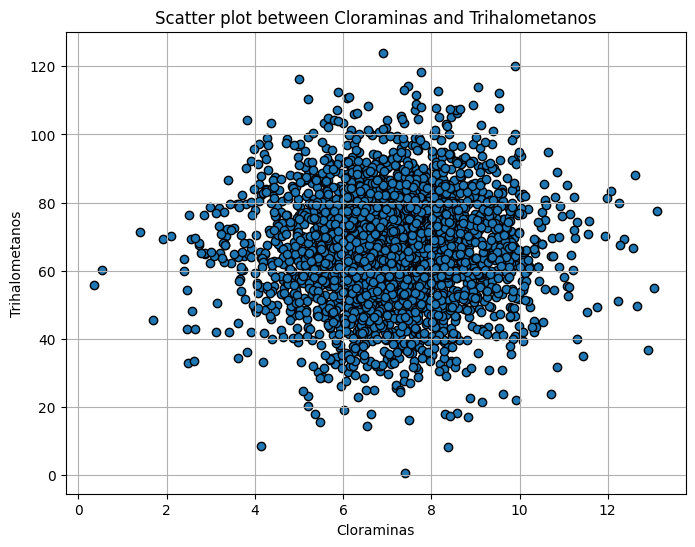

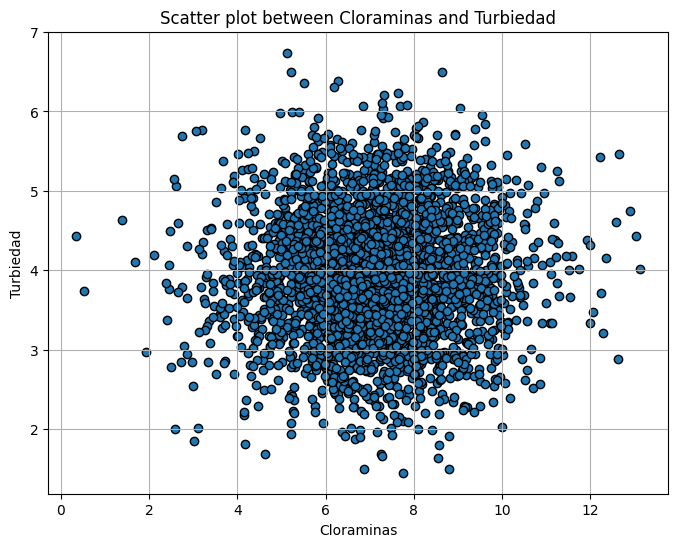

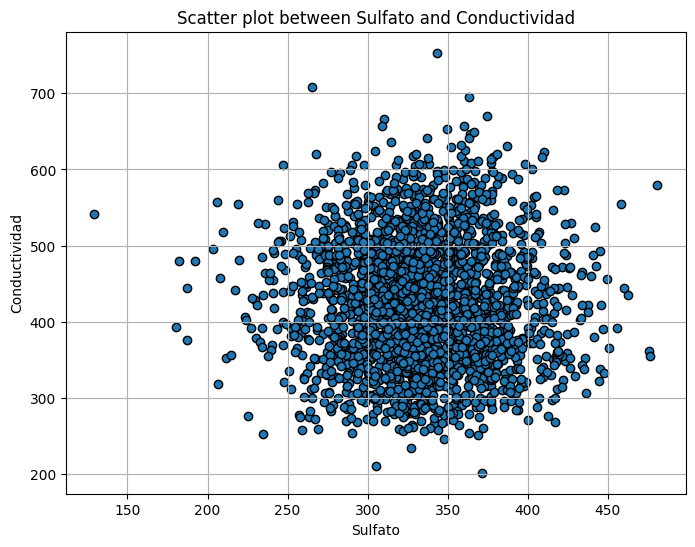

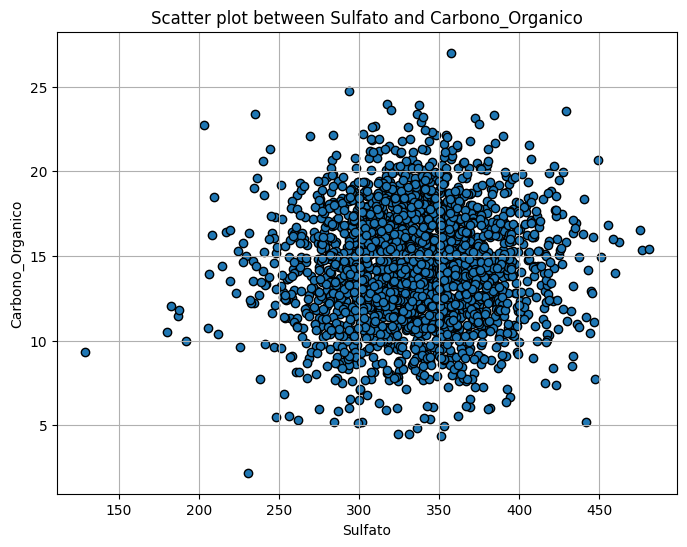

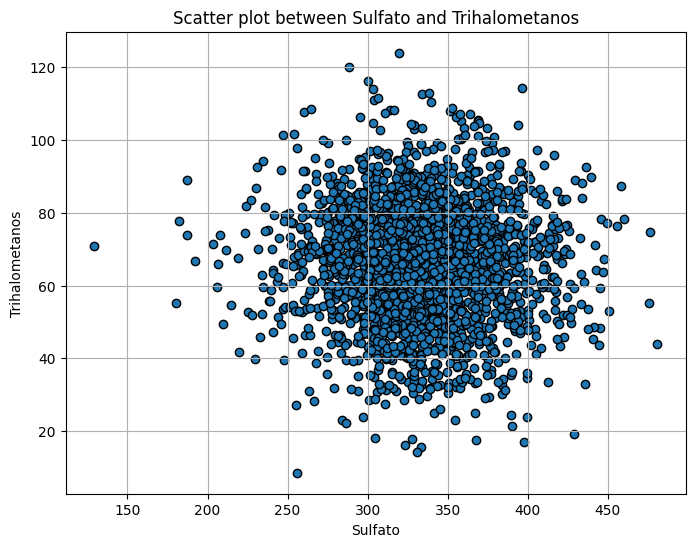

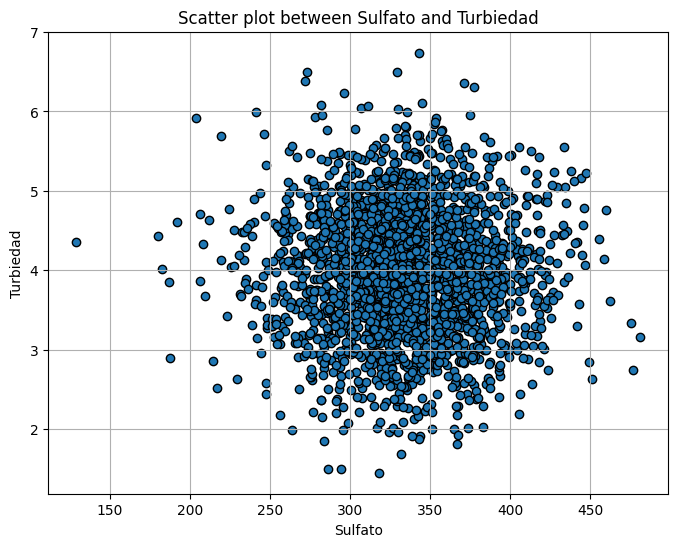

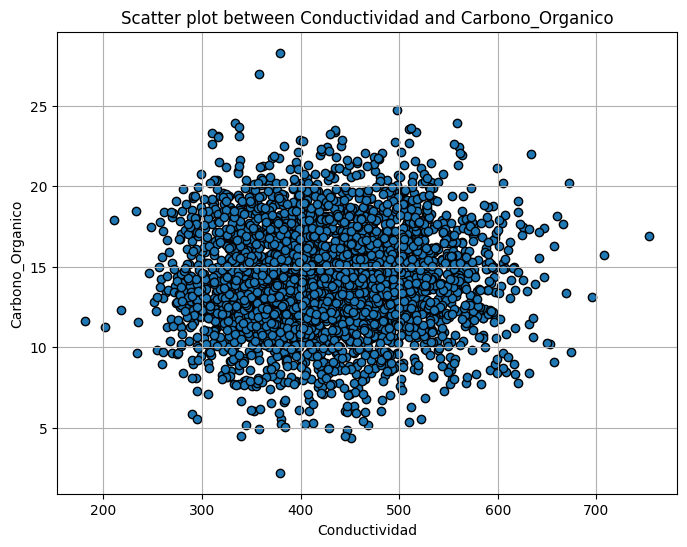

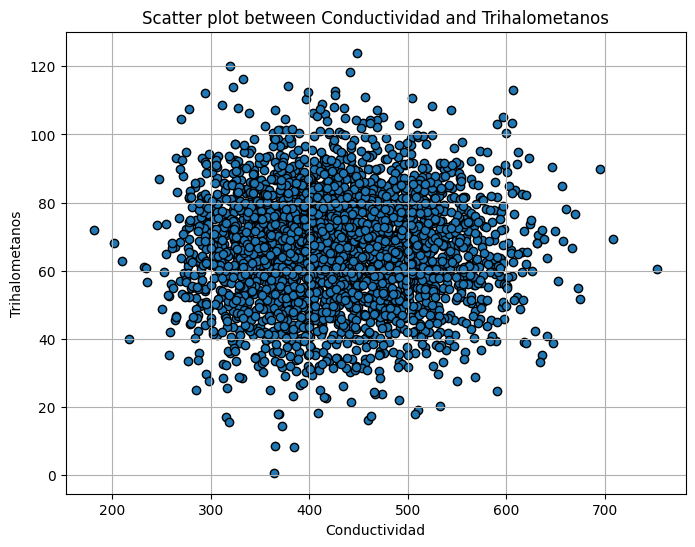

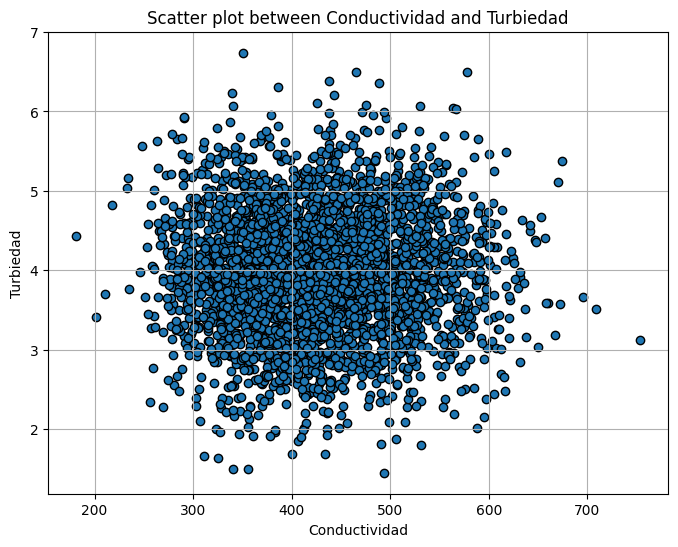

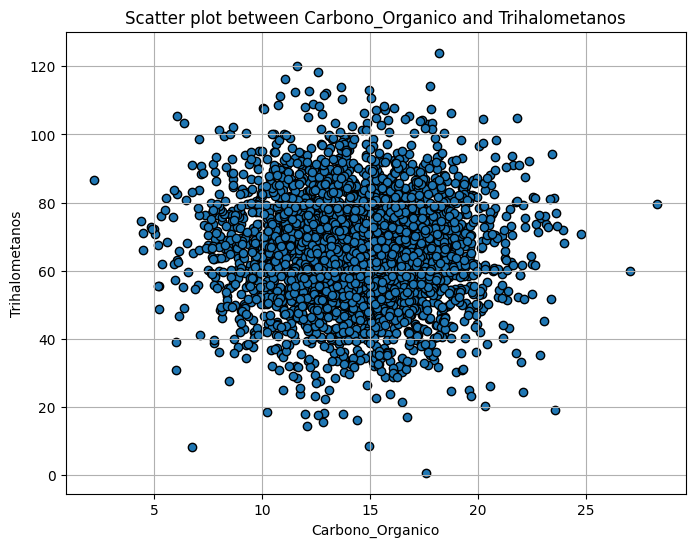

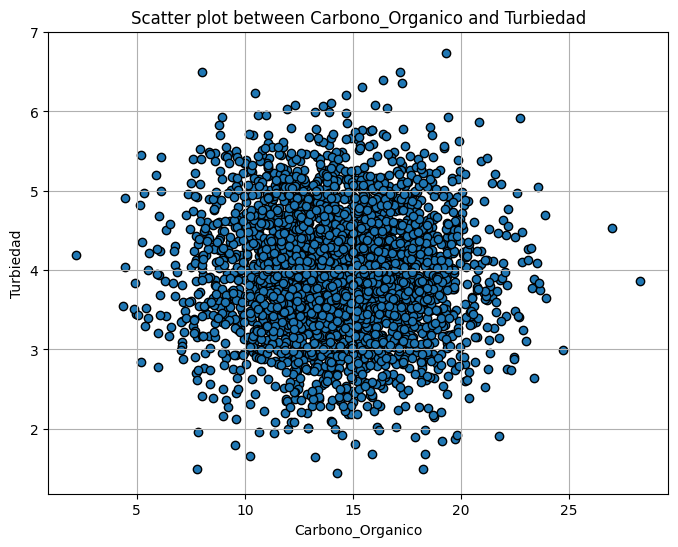

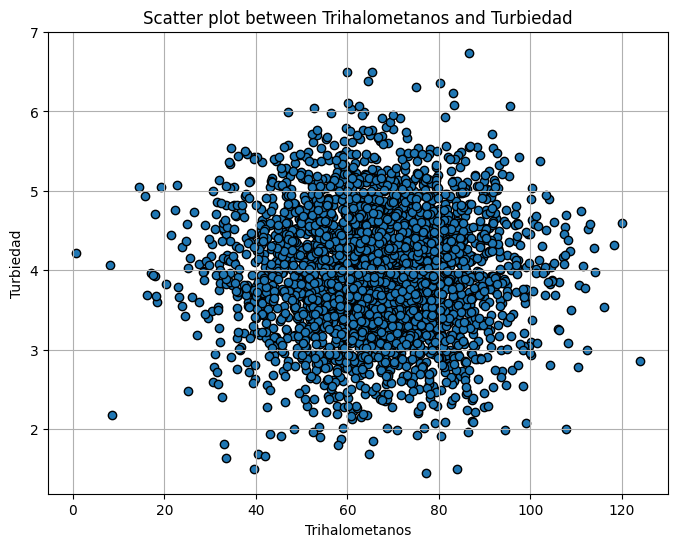

In [85]:
# Scatter plot between pairs of columns
from itertools import combinations

# Generate all combinations of columns
combs = combinations(columns, 2)

# Plot each combination of columns
for col1, col2 in combs:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col1], df[col2], edgecolor='black')
    plt.title(f'Scatter plot between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()



### Correlation Matrix 

What is a correlation matrix?
A correlation matrix is a table that shows the correlation coefficient between each pair of numerical variables in a dataset. The correlation coefficient is a value between -1 and 1 that indicates the linear relationship between two variables:

Correlation value = 1: Perfect positive correlation. When one variable increases, the other increases proportionally.

Correlation value = -1: Perfect negative correlation. When one variable increases, the other decreases proportionally.

Correlation value = 0: No linear correlation. There is no linear relationship between the variables.

Values close to 1 or -1: Indicate a strong relationship between variables (positive or negative).

Values close to 0: Indicate the variables are not linearly related, although they might have some non-linear relationship.

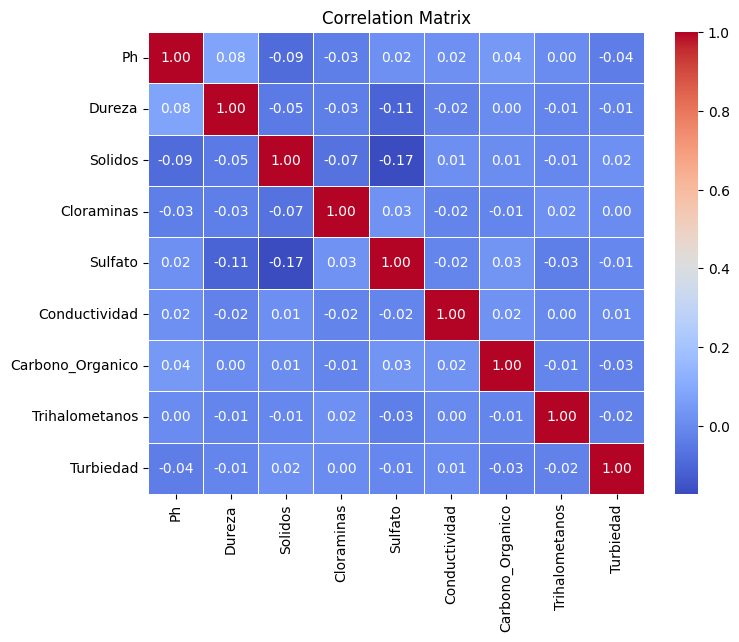

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Ph', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Conductividad', 'Carbono_Organico', 'Trihalometanos', 'Turbiedad']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Data preparation

#### Null value detection

In [87]:
# Count non-null values in each column
print(df.count())

Ph                  2785
Dureza              3276
Solidos             3276
Cloraminas          3276
Sulfato             2495
Conductividad       3276
Carbono_Organico    3276
Trihalometanos      3114
Turbiedad           3276
Potabilidad         3276
dtype: int64


In [88]:
# Check for null values
print(df.isnull())

         Ph  Dureza  Solidos  Cloraminas  Sulfato  Conductividad  \
0      True   False    False       False    False          False   
1     False   False    False       False     True          False   
2     False   False    False       False     True          False   
3     False   False    False       False    False          False   
4     False   False    False       False    False          False   
...     ...     ...      ...         ...      ...            ...   
3271  False   False    False       False    False          False   
3272  False   False    False       False     True          False   
3273  False   False    False       False     True          False   
3274  False   False    False       False     True          False   
3275  False   False    False       False     True          False   

      Carbono_Organico  Trihalometanos  Turbiedad  Potabilidad  
0                False           False      False        False  
1                False           False      False    

In [89]:
# Count null values in each column
print(df.isnull().sum())

Ph                  491
Dureza                0
Solidos               0
Cloraminas            0
Sulfato             781
Conductividad         0
Carbono_Organico      0
Trihalometanos      162
Turbiedad             0
Potabilidad           0
dtype: int64


### Imputation

The **mean** is the average of all the values in a numerical column. It is calculated by summing all the values and then dividing by the total number of elements.

The **median** is the value in the middle of an ordered data distribution. If you have a list of numbers, the median is the central value; if the number of elements is even, the median is the average of the two middle values.

The **mode** is the most frequent value in a dataset. If multiple observations share the same value, that value is considered the mode.

In [90]:
from sklearn.impute import SimpleImputer

# Select the columns you want to impute
columns_to_impute = ['Ph', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Conductividad', 'Carbono_Organico', 'Trihalometanos', 'Turbiedad']

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='median') # ,mean, median , most_frequent


# Impute only the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Show the DataFrame with the imputed values
print(df.head())

    Ph  Dureza  Solidos  Cloraminas  Sulfato  Conductividad  Carbono_Organico  \
0 7.04  204.89 20791.32        7.30   368.52         564.31             10.38   
1 3.72  129.42 18630.06        6.64   333.07         592.89             15.18   
2 8.10  224.24 19909.54        9.28   333.07         418.61             16.87   
3 8.32  214.37 22018.42        8.06   356.89         363.27             18.44   
4 9.09  181.10 17978.99        6.55   310.14         398.41             11.56   

   Trihalometanos  Turbiedad Potabilidad  
0           86.99       2.96  No Potable  
1           56.33       4.50  No Potable  
2           66.42       3.06  No Potable  
3          100.34       4.63  No Potable  
4           32.00       4.08  No Potable  


### MICE Imputation (Multiple Imputation by Chained Equations)
The MICE method is more advanced than simply using the mean or median because it considers the correlation between variables to predict missing values.

In [91]:
%pip install fancyimpute > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [92]:
from fancyimpute import IterativeImputer
import pandas as pd

# Select columns to impute
columns_to_impute = ['Ph', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Conductividad',
       'Carbono_Organico', 'Trihalometanos', 'Turbiedad']
data = df[columns_to_impute]

# Imputation with MICE
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(data)

# Replace in the original DataFrame
df[columns_to_impute] = imputed_data

### Outlier Detection
Outliers are typically identified based on the interquartile range (IQR). The IQR is the difference between the first quartile (Q1) and the third quartile (Q3). Any value outside the range.


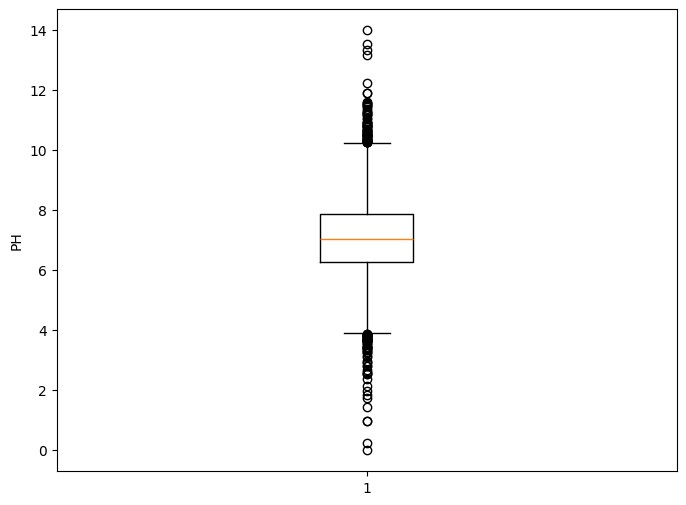

In [93]:
# Step 1: Detect outliers
Q1 = df[columns_to_impute].quantile(0.25)  # First quartile
Q3 = df[columns_to_impute].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # # Interquartile range (IQR)

# Define the limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

plt.figure(figsize=(8, 6))
plt.boxplot(df['Ph'])
plt.ylabel('PH')
plt.show()

In [94]:
df.count()

Ph                  3276
Dureza              3276
Solidos             3276
Cloraminas          3276
Sulfato             3276
Conductividad       3276
Carbono_Organico    3276
Trihalometanos      3276
Turbiedad           3276
Potabilidad         3276
dtype: int64

### Feature Selection
**X** represents the features (or independent variables) of the model. These are the columns used to predict the target variable.

**y** represents the target variable (or dependent variable), which is what we want to predict.

In [95]:
# 'Potability' is the target variable (in this case, for the water quality dataset)

X = df[columns_to_impute]  # Características
y = df['Potabilidad']  # Variable objetivo

In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Values in y:", y.value_counts())
print("Are there still null values?", X.isnull().sum().sum(), y.isnull().sum())
print("--------------------------------")
print("Values in y:", y_res.value_counts())
print("Are there still null values?", X_res.isnull().sum().sum(), y.isnull().sum())

Values in y: Potabilidad
No Potable    1998
Potable       1278
Name: count, dtype: int64
Are there still null values? 0 0
--------------------------------
Values in y: Potabilidad
No Potable    1998
Potable       1998
Name: count, dtype: int64
Are there still null values? 0 0


### Splitting Data into Training and Testing Sets
After separating the features (X) and the target variable (y), the next step is to split the data into training and testing sets. This is important to evaluate the model’s generalization ability and to avoid overfitting.

Usually, the data is split into two sets:

 - Training data: Used to train the model.

 - Testing data: Used to evaluate the model’s performance on unseen data.

```train_test_split()``` is a function that randomly splits the data into training and testing sets.

**X**: The features (inputs).

**y**: The target variable (output).

```test_size = 0.2```: This means 20% of the data will be used for testing, and the remaining 80% for training. You can adjust this depending on the size of your dataset.

```random_state = 42```: This sets a random seed for data splitting to ensure reproducibility in future runs.

In [97]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### This is a side note within the project: I will use ```lazyPredict``` to quickly find the best model according to my dataset.

In [98]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [99]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Split after scaling
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

# LazyPredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1592, number of negative: 1604
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3196, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498123 -> initscore=-0.007509
[LightGBM] [Info] Start training from score -0.007509
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.72               0.72    None      0.72   
RandomForestClassifier             0.71               0.71    None      0.71   
BaggingClassifier                  0.70               0.70    None      0.70   
LGBMClassifier                     0.69               0.69    None      0.69   
NuSVC                         

### Decision Tree Model Creation
The decision tree is a supervised learning algorithm used for classification, which splits the data into binary decisions through nodes.

In this case, a random seed (random_state=42) is set to ensure the results are reproducible in future runs. The resulting model can be trained with the feature data and evaluated based on its performance.

In [100]:
# Create the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
#model = DecisionTreeClassifier(random_state=42)


### Training
- model: This is the machine learning model being used (in this case, a decision tree).

- X_train: The input training data (also called features or attributes). Each row is a training example and each column represents a feature.

- y_train: The labels or target values corresponding to the training data in X_train.

In [101]:
# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

### Evaluation Metrics

- **Accuracy** is the proportion of correct predictions (true outcomes) out of the total number of predictions made. In other words, it measures how often the model is correct.

- **Recall** (also known as sensitivity or true positive rate) measures the percentage of actual positive instances that were correctly identified by the model.

- **F1-Score** is the harmonic mean of precision and recall. It is a metric that balances both aspects, making it especially useful when working with imbalanced datasets.

In [102]:
# Evaluate the model's performance
print("Model's accuracy:", accuracy_score(y_test, y_pred))
print("\nRClassification report:")
print(classification_report(y_test, y_pred))

Model's accuracy: 0.725

RClassification report:
              precision    recall  f1-score   support

  No Potable       0.71      0.74      0.72       394
     Potable       0.74      0.71      0.72       406

    accuracy                           0.72       800
   macro avg       0.73      0.73      0.72       800
weighted avg       0.73      0.72      0.72       800



### Confusion Matrix


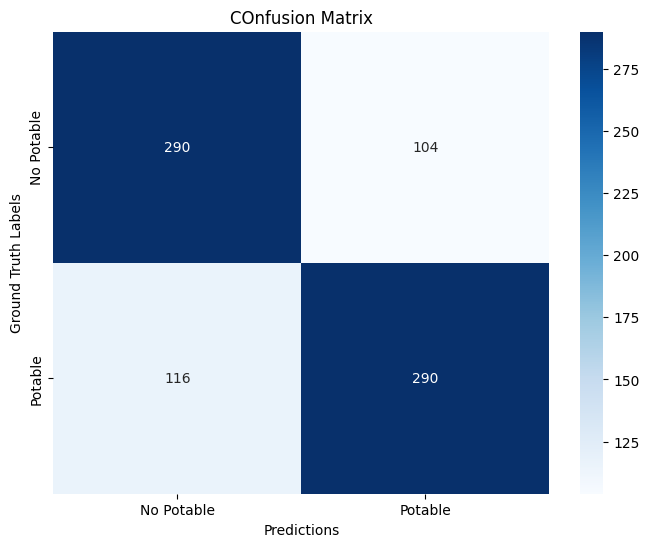

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=df['Potabilidad'].unique(), yticklabels=df['Potabilidad'].unique())

# Add titles and labels
plt.title('COnfusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Ground Truth Labels')

# Display the plot
plt.show()

### Verify Input Features

In [104]:
# Check the number of input features for the model, in this case for DecisionTreeClassifier

#print(modelo.feature_names_in_)

### Saving the model

In [106]:
import joblib

joblib.dump(model, 'wq_model.pkl')

['wq_model.pkl']